## Practice Assignment 4

In [1]:
import numpy as np

# Dataset
hours = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
scores = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])

print("Dataset loaded successfully.")

Dataset loaded successfully.


### Split the Dataset:

In [2]:
from sklearn.model_selection import train_test_split

# Split the dataset into training (60%), validation (20%), and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(hours, scores, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Dataset split into training, validation, and testing sets.")

Dataset split into training, validation, and testing sets.


### Implementing Gradient Descent


In [3]:
def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    m = len(y)  # number of training examples
    beta0 = 0  # initialize beta0 (or theta0)
    beta1 = 0  # initialize beta1 (or theta1)
    
    for _ in range(iterations):
        y_pred = beta0 + beta1 * X  # predict y using the current beta values
        d_beta0 = (1/m) * sum(y_pred - y)  # partial derivative w.r.t beta0
        d_beta1 = (1/m) * sum((y_pred - y) * X)  # partial derivative w.r.t beta1
        
        # Update beta0 and beta1 using the gradient descent rule
        beta0 = beta0 - learning_rate * d_beta0
        beta1 = beta1 - learning_rate * d_beta1
    
    return beta0, beta1  # return the optimized values


### Evaluate the Model on Validation Set

In [4]:
def evaluate_model(X, y, beta0, beta1):
    y_pred = beta0 + beta1 * X
    mse = np.mean((y_pred - y) ** 2)
    return mse

# Training the model
beta0, beta1 = gradient_descent(X_train, y_train)

# Evaluating on validation set
val_mse = evaluate_model(X_val, y_val, beta0, beta1)
print(f'Validation MSE: {val_mse}')

Validation MSE: 0.0002743037177659931


### Find the Final Value of the Parameters

In [5]:
# Final parameters after gradient descent
print(f'Final parameters: beta0 = {beta0}, beta1 = {beta1}')

Final parameters: beta0 = 0.07544424206715941, beta1 = 1.9893546314780122


### Test the Model on Testing Data

In [6]:
# Evaluating on test set
test_mse = evaluate_model(X_test, y_test, beta0, beta1)
print(f'Test MSE: {test_mse}')

Test MSE: 0.0035657480595095463


### Visualizing Results

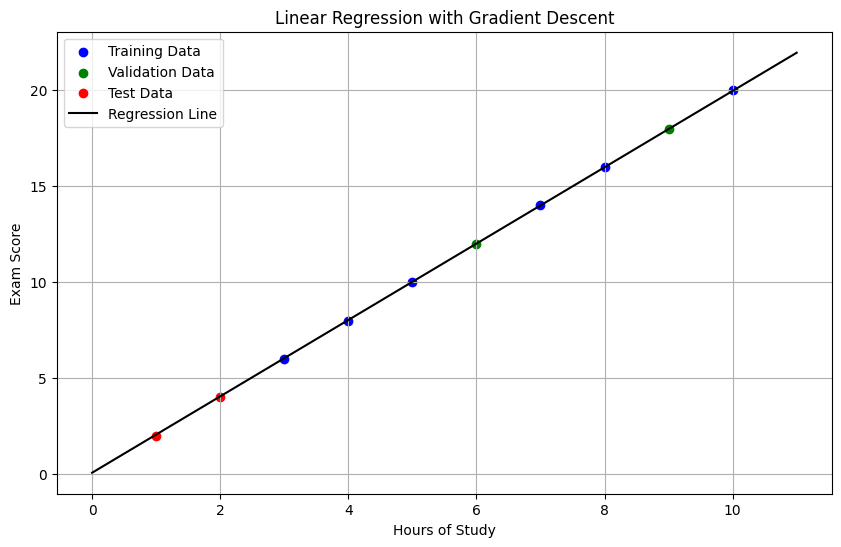

In [7]:
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot training data
plt.scatter(X_train, y_train, color='blue', label='Training Data')
# Plot validation data
plt.scatter(X_val, y_val, color='green', label='Validation Data')
# Plot test data
plt.scatter(X_test, y_test, color='red', label='Test Data')

# Plot regression line
x_line = np.linspace(0, 11, 100)
y_line = beta0 + beta1 * x_line
plt.plot(x_line, y_line, color='black', label='Regression Line')

# Adding titles and labels
plt.title('Linear Regression with Gradient Descent')
plt.xlabel('Hours of Study')
plt.ylabel('Exam Score')
plt.legend()
plt.grid(True)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=aa09a8a7-e5ce-491c-83d3-526f85db1462' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>